<a href="https://colab.research.google.com/github/Shyamsundarkanaka/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading the data set and Overview

In [ ]:
#Loading the data set
path = '/content/drive/MyDrive/Colab Notebooks/Data science/Capstone Projects/Retail Sales Prediction - Shyam Sundar K/Data'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science/Capstone Projects/Retail Sales Prediction - Shyam Sundar K/Data/Rossmann Stores Data.csv')
df_meta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science/Capstone Projects/Retail Sales Prediction - Shyam Sundar K/Data/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df.shape)
print(df_meta.shape)

(1017209, 9)
(1115, 10)


In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_meta

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
df_meta.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
df = df.sort_values('Date')

In [ ]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-08-09,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
df_meta.Promo2SinceYear.value_counts()

2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

In [ ]:
df_meta.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [ ]:
df_meta.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
df_meta[df_meta.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## We can see that there are 2 data sets, main data of over a million rows which has data or 1115 stores and there is one more data set that gives information for each of these store

##Data Cleaning

In [ ]:
df_meta_backup = df_meta.copy()

In [ ]:
df_meta.CompetitionOpenSinceYear.mean()

2008.6688567674114

In [ ]:
df_meta[df_meta.CompetitionOpenSinceYear >2013].shape[0]/df_meta[df_meta.CompetitionOpenSinceYear <2013].shape[0]

0.18947368421052632

In [ ]:
df_meta[df_meta.CompetitionOpenSinceYear >2014].shape

(38, 10)

In [ ]:
df_meta.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

### We can see there are lot of null values in competion open since Year, and for available data we can more than 80% of the competitors open before 2013, and we are doing analysis for sales after 2013, we will drop the columns CompetitionOpenSinceYear and CompetitionOpenSinceMonth

In [ ]:
df_meta[df_meta.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
df_meta.CompetitionDistance.fillna(value = df_meta.CompetitionDistance.mean(), inplace = True)

In [ ]:
df_meta.CompetitionDistance.isnull().sum()

0

### Filling the 3 missing values in competetion distance by mean value of the column.

In [ ]:
df_meta[df_meta.Promo2==0].isna().sum()

Store                    0
StoreType                0
Assortment               0
CompetitionDistance      0
Promo2                   0
Promo2SinceWeek        544
Promo2SinceYear        544
PromoInterval          544
dtype: int64

In [ ]:
df_meta.Promo2SinceYear.value_counts()

2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

In [ ]:
type(df.Date.max())

str

In [ ]:
df.Date = pd.to_datetime(df.Date)
print(df.Date.max())
print(df.Date.max().year)
print(df.Date.max().week)

2015-07-31 00:00:00
2015
31


In [ ]:
df_meta.Promo2SinceYear.fillna(value = (df.Date.max().year),inplace=True)
df_meta.Promo2SinceWeek.fillna(value = (df.Date.max().week),inplace=True)
df_meta.isnull().sum()

Store                    0
StoreType                0
Assortment               0
CompetitionDistance      0
Promo2                   0
Promo2SinceWeek          0
Promo2SinceYear          0
PromoInterval          544
dtype: int64

### We are filling null of the promo2 date after the latest day of the available data. It is done as it makes it easy for us to check if the promotion was active while merging the datasets.

In [ ]:
df_meta.PromoInterval.fillna(value = 'None',inplace=True)

### We are filling null of the promoInterval with None which will be used for one hot encoding once the datasets are merged.

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

def get_date(year,week):
  year = int(year)
  week = int(week)
  date = datetime.date(year, 1, 1) + relativedelta(weeks=+week)
  return(date)

In [ ]:
df_meta['promo2_start_date'] = df_meta.apply(lambda x: get_date(x.Promo2SinceYear,x.Promo2SinceWeek),axis=1)


In [ ]:
df_meta.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

### 'Promo2','Promo2SinceWeek','Promo2SinceYear' are merged as one promo2_start_date. Now the data set is ready to be merged.

In [ ]:
df_meta

,Store,StoreType,Assortment,CompetitionDistance,PromoInterval,promo2_start_date
0,1,c,a,1270.0,None,2015-08-06
1,2,a,a,570.0,"Jan,Apr,Jul,Oct",2010-04-02
2,3,a,a,14130.0,"Jan,Apr,Jul,Oct",2011-04-09
3,4,c,c,620.0,None,2015-08-06
4,5,a,a,29910.0,None,2015-08-06
...,...,...,...,...,...,...
1110,1111,a,a,1900.0,"Jan,Apr,Jul,Oct",2013-08-06
1111,1112,c,c,1880.0,None,2015-08-06
1112,1113,a,c,9260.0,None,2015-08-06
1113,1114,a,c,870.0,None,2015-08-06


# EDA

In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
745,746,5,2015-07-31,9082,638,1,1,0,1
746,747,5,2015-07-31,10708,826,1,1,0,1
747,748,5,2015-07-31,7481,578,1,1,0,1
741,742,5,2015-07-31,10460,1016,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [ ]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1017208 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 77.6+ MB


2013
2014
2015


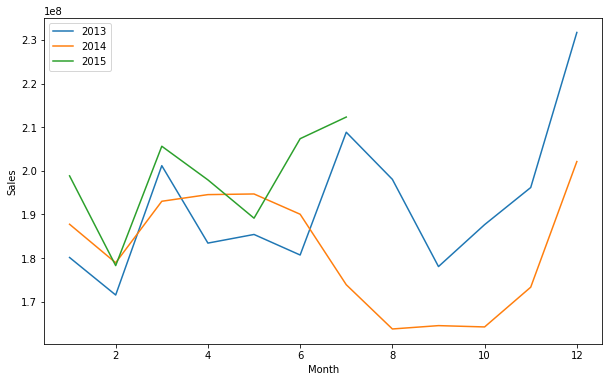

In [ ]:
plt.figure(figsize=(10,6))
for y in set(df.Date.dt.year):
  print(y)
  df_temp = pd.DataFrame(df[df.Date.dt.year==y].groupby(df.Date.dt.month)['Sales'].sum())
  plt.plot(df_temp,label=y)
  plt.legend()
  plt.xlabel("Month")
  plt.ylabel("Sales")

2013


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


2014


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


2015


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


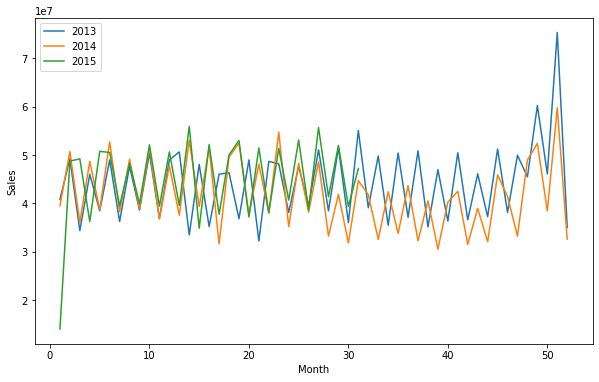

In [ ]:
plt.figure(figsize=(10,6))
for y in set(df.Date.dt.year):
  print(y)
  df_temp = pd.DataFrame(df[df.Date.dt.year==y].groupby(df.Date.dt.week)['Sales'].sum())
  plt.plot(df_temp,label=y)
  plt.legend()
  plt.xlabel("Month")
  plt.ylabel("Sales")

,Sales
Date,
2013,406974
2014,373855
2015,236380


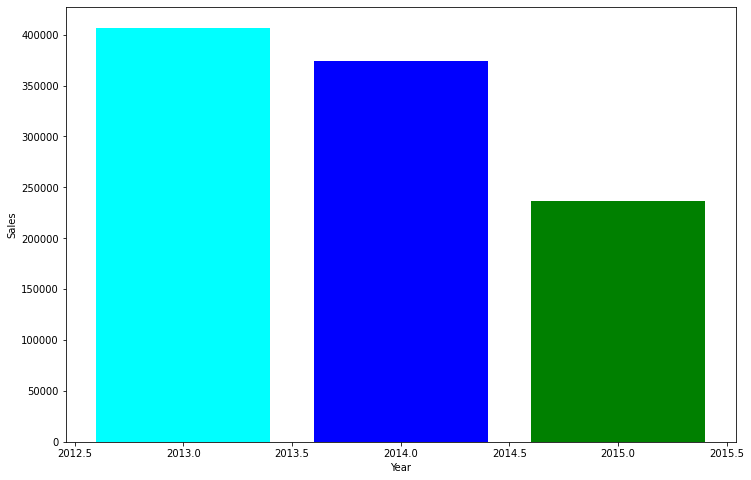

In [ ]:
plt.figure(figsize=(12,8))
df_temp = pd.DataFrame(df.groupby(df.Date.dt.year)['Sales'].count())
plt.xlabel("Year")
plt.ylabel("Sales")
plt.bar(df_temp.index, df_temp.Sales, color = ['cyan', 'blue', 'green'])
df_temp

<BarContainer object of 7 artists>

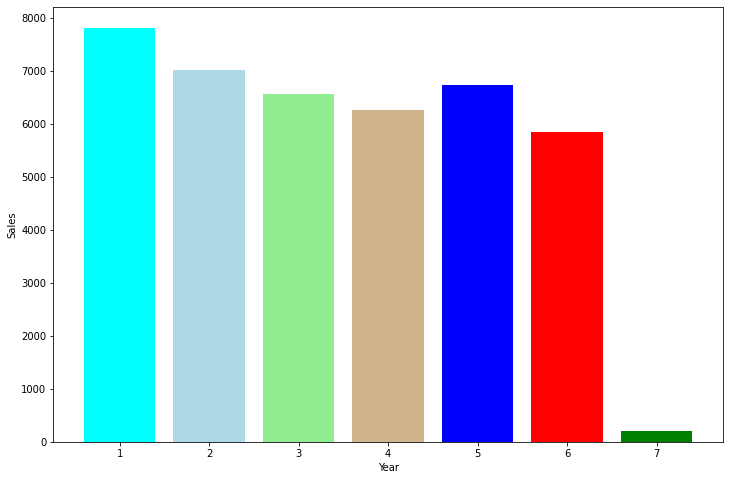

In [ ]:
plt.figure(figsize=(12,8))
df_temp = pd.DataFrame(df.groupby(df.DayOfWeek)['Sales'].mean())
days = {1:'m',2:'t',3:'w',4:'t',5:'f',6:'s',7:'s'}

plt.xlabel("Year")
plt.ylabel("Sales")
plt.bar(df_temp.index, df_temp.Sales, color = ['cyan', 'lightblue', 'lightgreen', 'tan','blue','red','green'])

<BarContainer object of 7 artists>

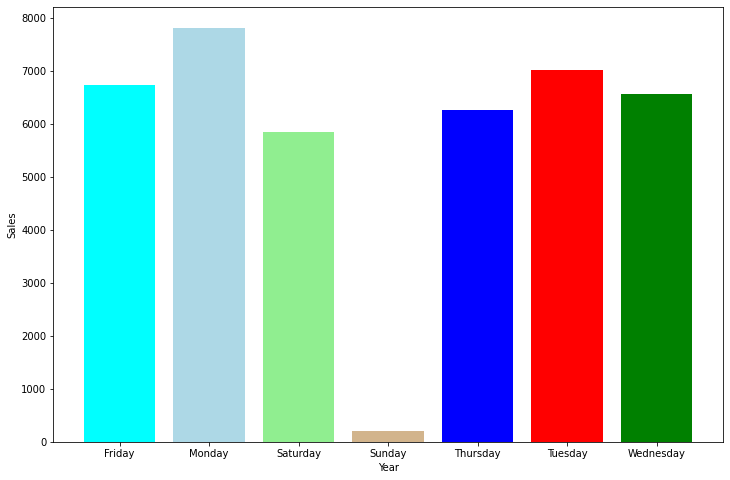

In [ ]:
df
plt.figure(figsize=(12,8))
df_temp = pd.DataFrame(df.groupby(df.Date.dt.day_name())['Sales'].mean())
df_temp
plt.xlabel("Year")
plt.ylabel("Sales")
plt.bar(df_temp.index, df_temp.Sales, color = ['cyan', 'lightblue', 'lightgreen', 'tan','blue','red','green'])


In [ ]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


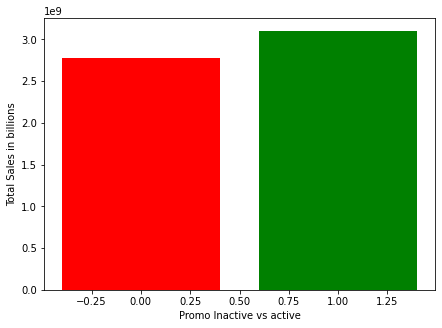

In [ ]:
plt.figure(figsize=(7,5))
df_temp = pd.DataFrame(df.groupby(df.Promo)['Sales'].sum())
plt.bar(df_temp.index,df_temp.Sales, color =['red','green'])
plt.ylabel('Total Sales in billions')
plt.xlabel('Promo Inactive vs active')
plt.xticks()
plt.show()